# EDA

## Importando as bibliotecas que serão usadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV,LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from mlxtend.plotting import plot_confusion_matrix



cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Configurando o pandas para exibir todas as colunas do dataset

In [2]:

pd.set_option("display.max_columns",None)

## Carregando os data sets (vinho branco e vinho vermelho) e os exibindo. Também criaremos uma coluna para identificar se o vinho é vermelho ou não

In [3]:
dfred = pd.read_csv('winequality-red.csv',sep=';')
dfwhite = pd.read_csv('winequality-white.csv',sep=';')
dfred['redwine'] = 1
dfwhite['redwine'] = 0


display(dfred.head(),dfwhite.head())

#para saber a forma de cada dataset(linhas e colunas)
print(dfred.shape,dfwhite.shape)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  redwine  
0      9.4        5        1  
1      9.8        5        1  
2      9.8        5        1  
3      9.8        6        1  
4      9.4        5        1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  redwine  
0      8.8        6        0  
1      9.5        6        0  
2     10.1        6        0  
3      9.9        6        0  
4      9.9        6        0

(1599, 13) (4898, 13)


## Uniremos as 2 bases de vinhos 

In [54]:
df = pd.concat((dfred,dfwhite))

print(dfred.shape,dfwhite.shape,df.shape)

display(df.head())

(1599, 13) (4898, 13) (6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  redwine  
0      9.4        5        1  
1      9.8        5        1  
2      9.8        5        1  
3      9.8        6        1  
4      9.4        5        1

## Verificando o tipo das variáveis e o espaço ocupado

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  redwine               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


Todos os dados do dataset são numéricos, o que facilitará as análises

## Verificaremos também se existem dados missing

In [6]:
df.isna().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
redwine                 0
dtype: int64

Não existe nenhum dado missing, o que é excelente

## Verificaremos algumas medidas de posição e dispersão do dataset para ter uma melhor ideia de como os dados estão distribuídos

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality      redwine  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.246114  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

A variável target, quality, não apresenta nenhum valor que não faça sentido (fora do range entre 1 e 10). Além disso nenhum dado parece ter valores suspeitos

## Como o dataset é de variantes de vinho é possível que existam dados duplicados, dessa forma iremos checar isso também

In [8]:

dfred.duplicated().sum() + dfwhite.duplicated().sum()

1177

os datasets separados tem menos duplicatas do que juntos, logo existem vinhos com as mesmas caracteristicas nos dois datasets como são somente 2 casos de diferença vamos ignorar

In [9]:
df.duplicated().sum()

1177

Como as duplicadas correspondem a 1/6 da nossa base de dados, não iremos dropa-las já que isso reduzirá bastante nossas base de treino e teste que já não são muito extensas 


## Vamos criar um boxplot para começar a ter uma ideia de como se comportam as variáveis

In [10]:
box = df.drop(labels='redwine',axis=1)
box.iplot(kind='box',orientation='h',subplots=True)

As variáveis total sulfur dioxide, free sulfur dioxide e residual sugar são as que apresentam maior dispersão dos dados. As duas primeiras estão altamente relacionadas então é esperado que se uma variar muito a outra também apresentará esse comportamento

<Figure size 1440x1080 with 0 Axes>

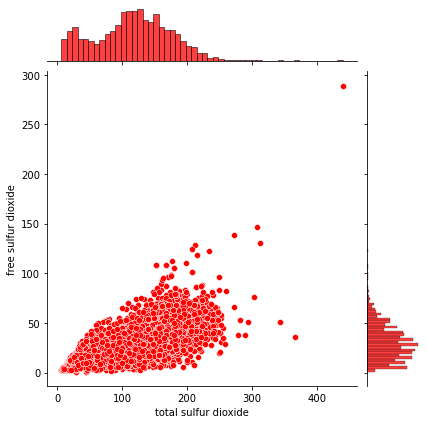

In [11]:
plt.figure(figsize=(20,15))
sns.jointplot(data=df,x='total sulfur dioxide',y='free sulfur dioxide',color='r')


## Desenhando o histograma da variável target para ver como estão distribuídos os valores

In [12]:
fig= df['quality'].iplot(kind='hist',color='grey',title='Wine Quality')

Aparentemente a variável target é normal e os valores estão bem concentrados na qualidade 5 e 6

In [13]:
df['quality'].value_counts(normalize=True)*100

6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64

## Olhando o vies das variáveis

In [14]:
bias = df.skew()

great_bias = bias[abs(bias)>0.75]

display(bias)
print(35*'-')
display(great_bias)

fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
redwine                 1.179095
dtype: float64

-----------------------------------


fixed acidity          1.723290
volatile acidity       1.495097
residual sugar         1.435404
chlorides              5.399828
free sulfur dioxide    1.220066
sulphates              1.797270
redwine                1.179095
dtype: float64

Chlorides é a variável mais enviesada tendo a maior concetração dos dados em valores menores

## Vamos verificar também como estão as distribuições das outras variáveis 

In [15]:
box.iplot(kind='hist',subplots=True,dimensions=(1000, 1000))

In [16]:
df[great_bias.index].iplot(kind='hist',subplots=True,dimensions=(1000, 1000))

As variáveis acima parecem bem pouco normais e será necessário normalizar os dados antes de criar o modelo com certeza

## Vamos observar também como as variaveis interagem entre sí

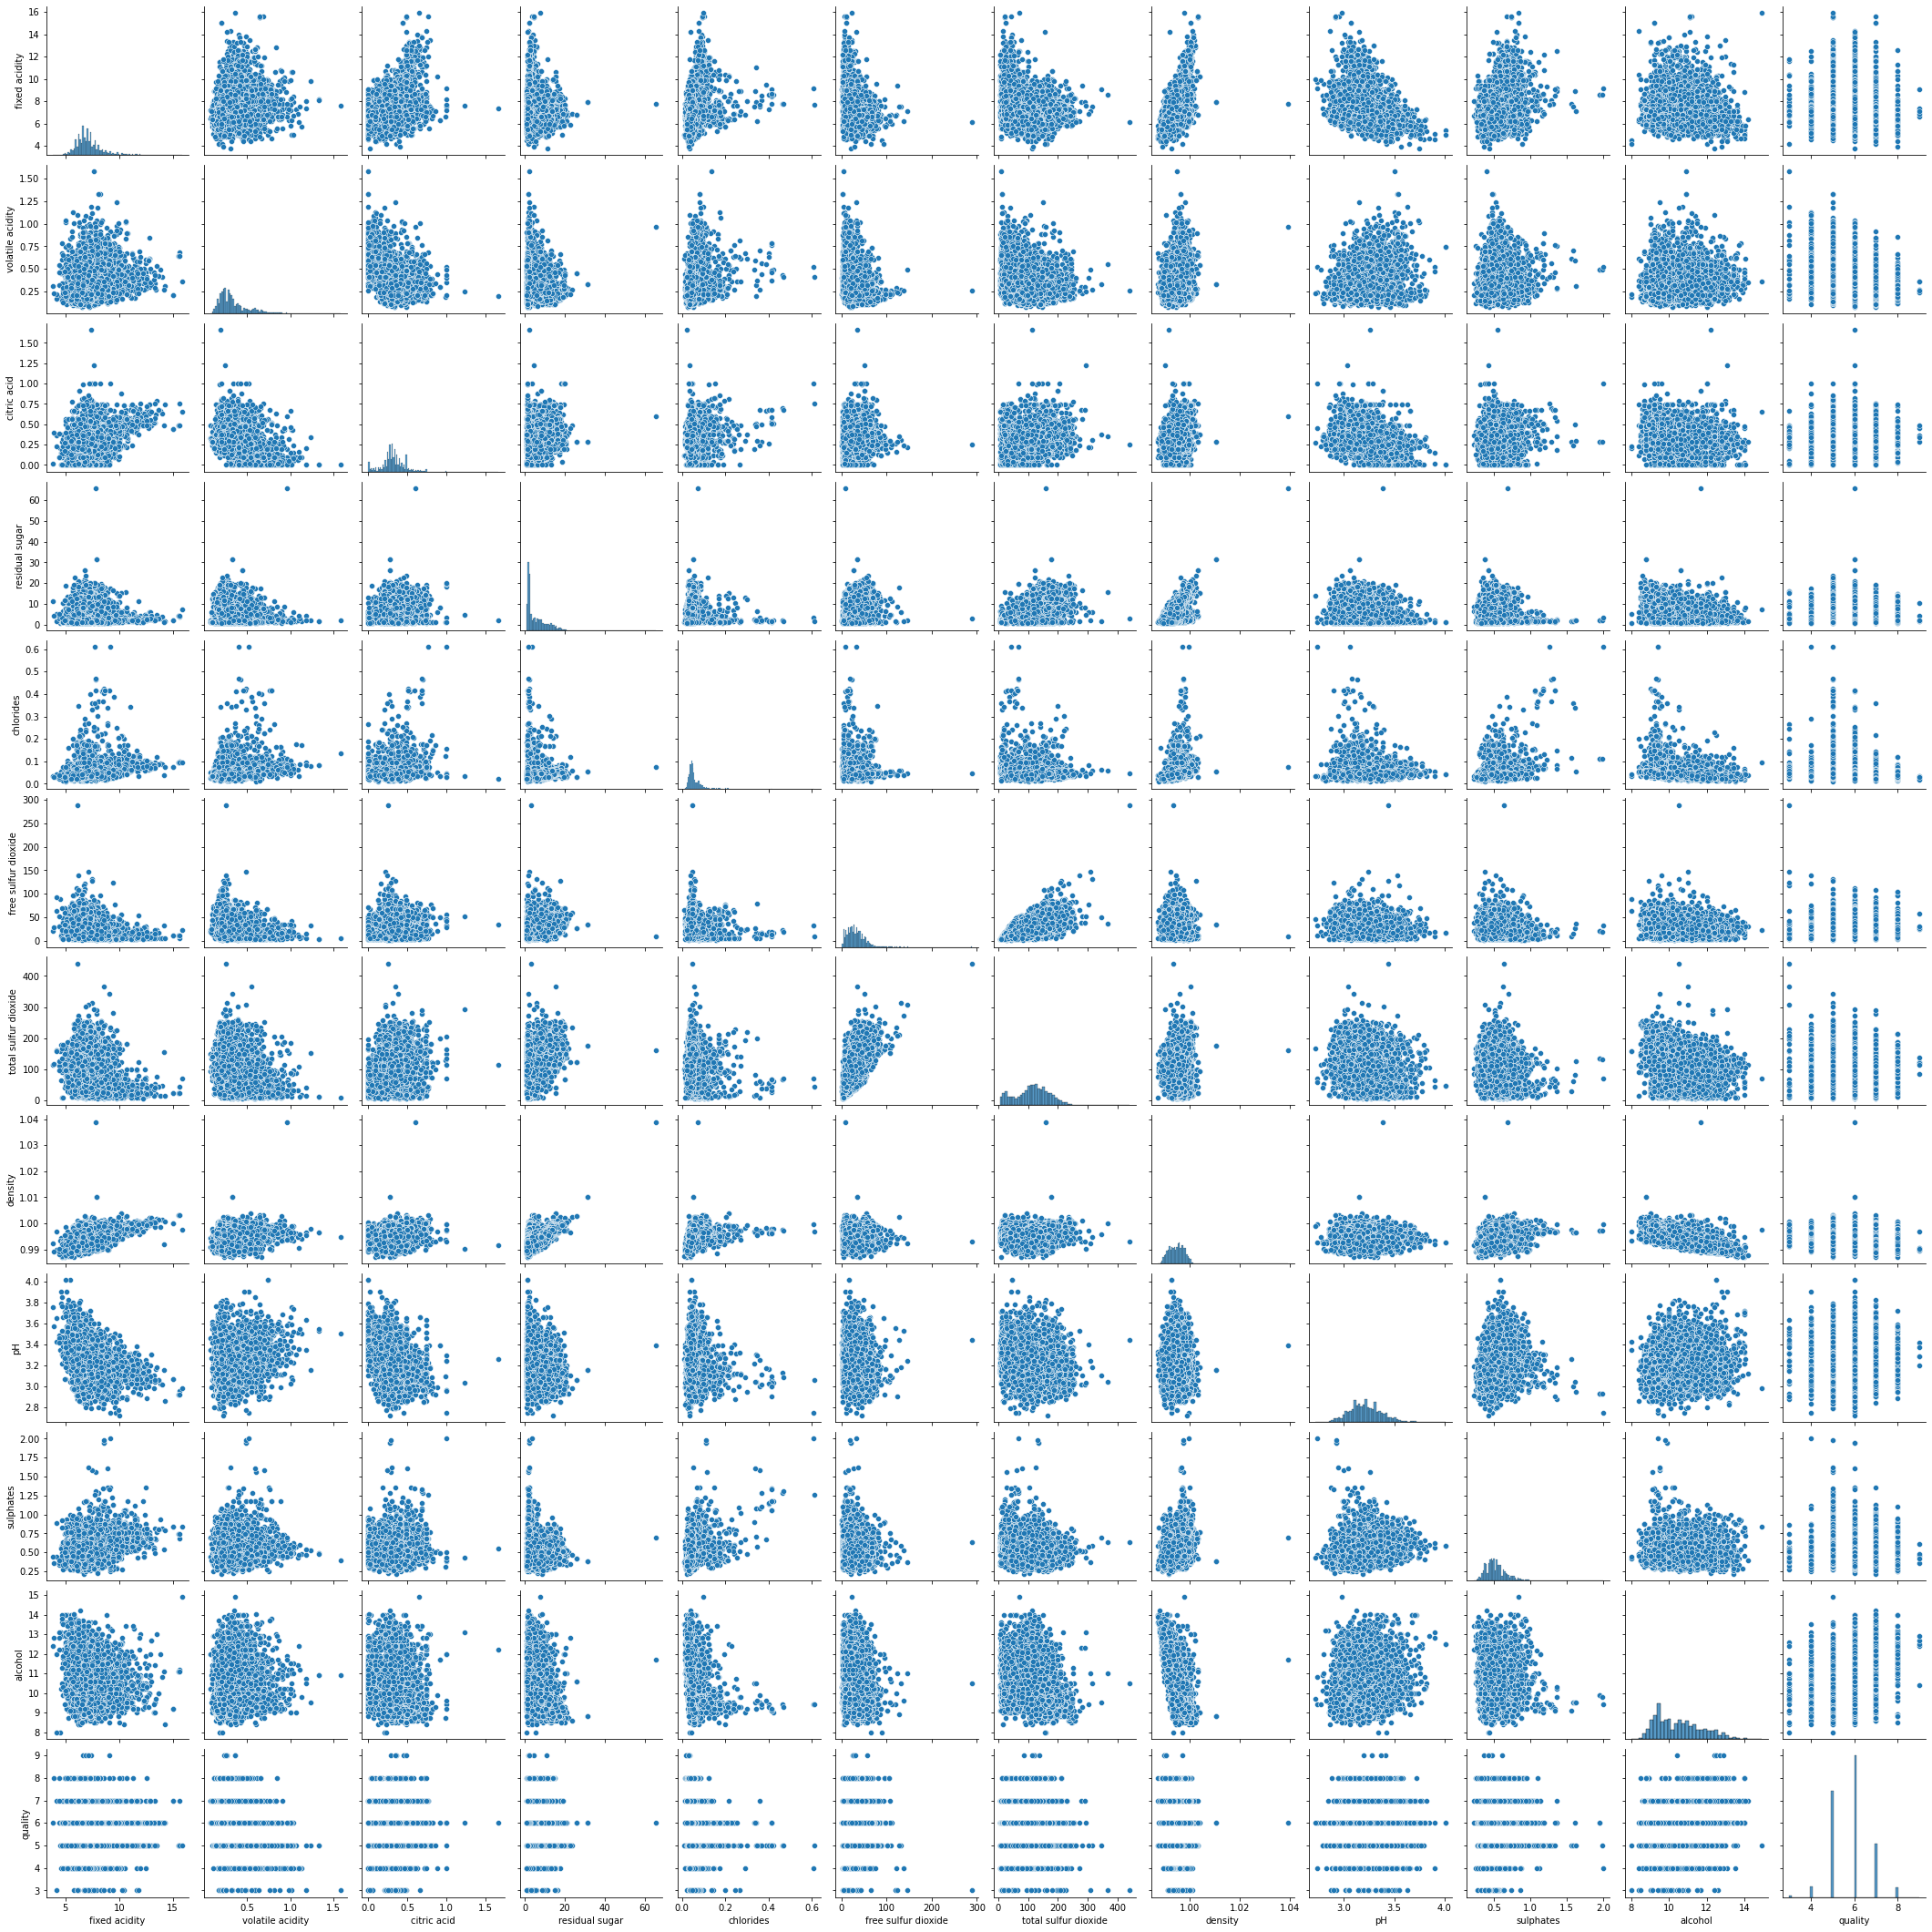

In [17]:
sns.pairplot(box)

Como são muitas features o pair plot não fica tão interessante de visualizar e será melhor olhar pela matriz de correlação

<AxesSubplot:>

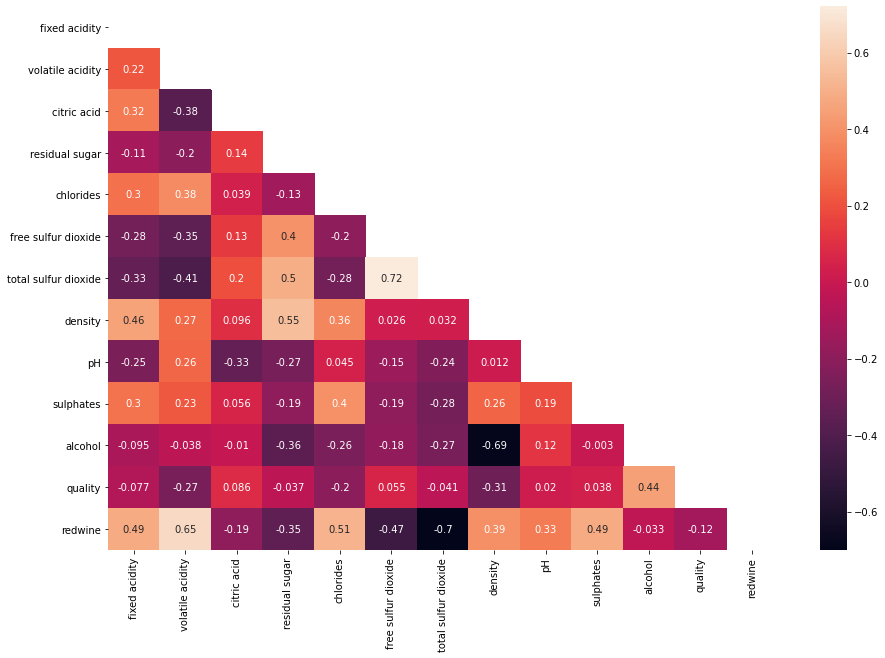

In [18]:
mask = np.triu(df.corr())

plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),mask=mask,annot=True)

# nenhuma correlação muito alta entre as variáveis. O Alcool é a feature mais correlacionada a qualidade do vinho

Para visualizar melhor como as features se relacionam com a qualidade do vinho, vamos plotar os distplots 

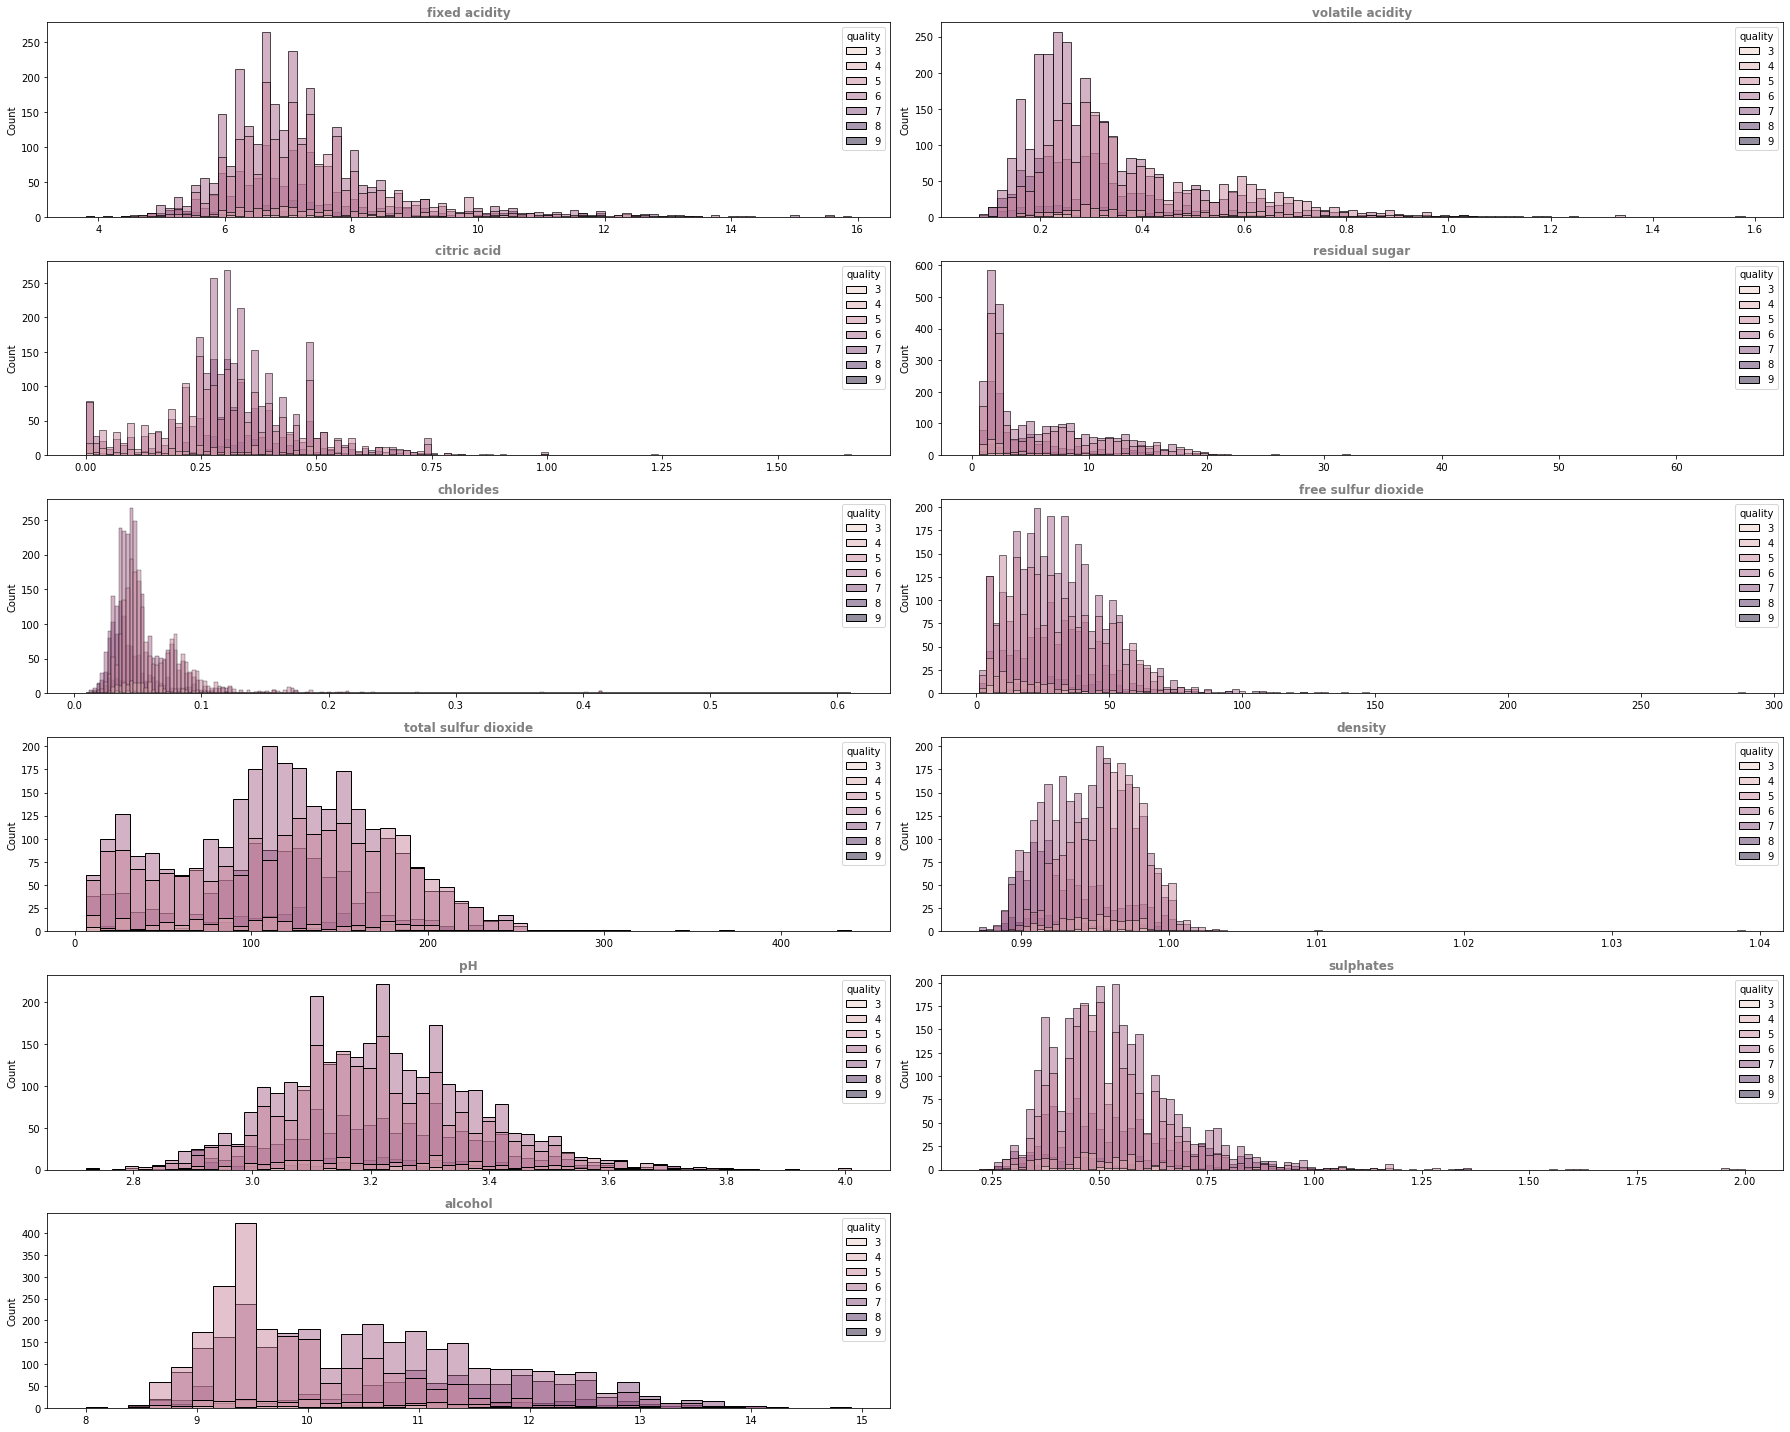

In [19]:
fig, axs = plt.subplots(6,2,figsize=(25,20))
axs = axs.ravel()

for column,ax in zip(df.columns[:-2],axs):
    sns.histplot(data=df,x=column,hue='quality',ax=ax)
    ax.set_title(column,fontweight='bold',color='grey')
    ax.set_xlabel(None)

fig.delaxes(axs[-1])
plt.tight_layout()

Pelos histogramas parece que as features são estão dividindo bem a variável target, os histogramas para todos os valores da variável target estão ficando bastante sobrepostos

## Por ultimo vamos fazer um boxplot multiplo para cada variável em relação a target para ver se o comportamento é crescente ou decrescente de acordo com a qualidade do vinho

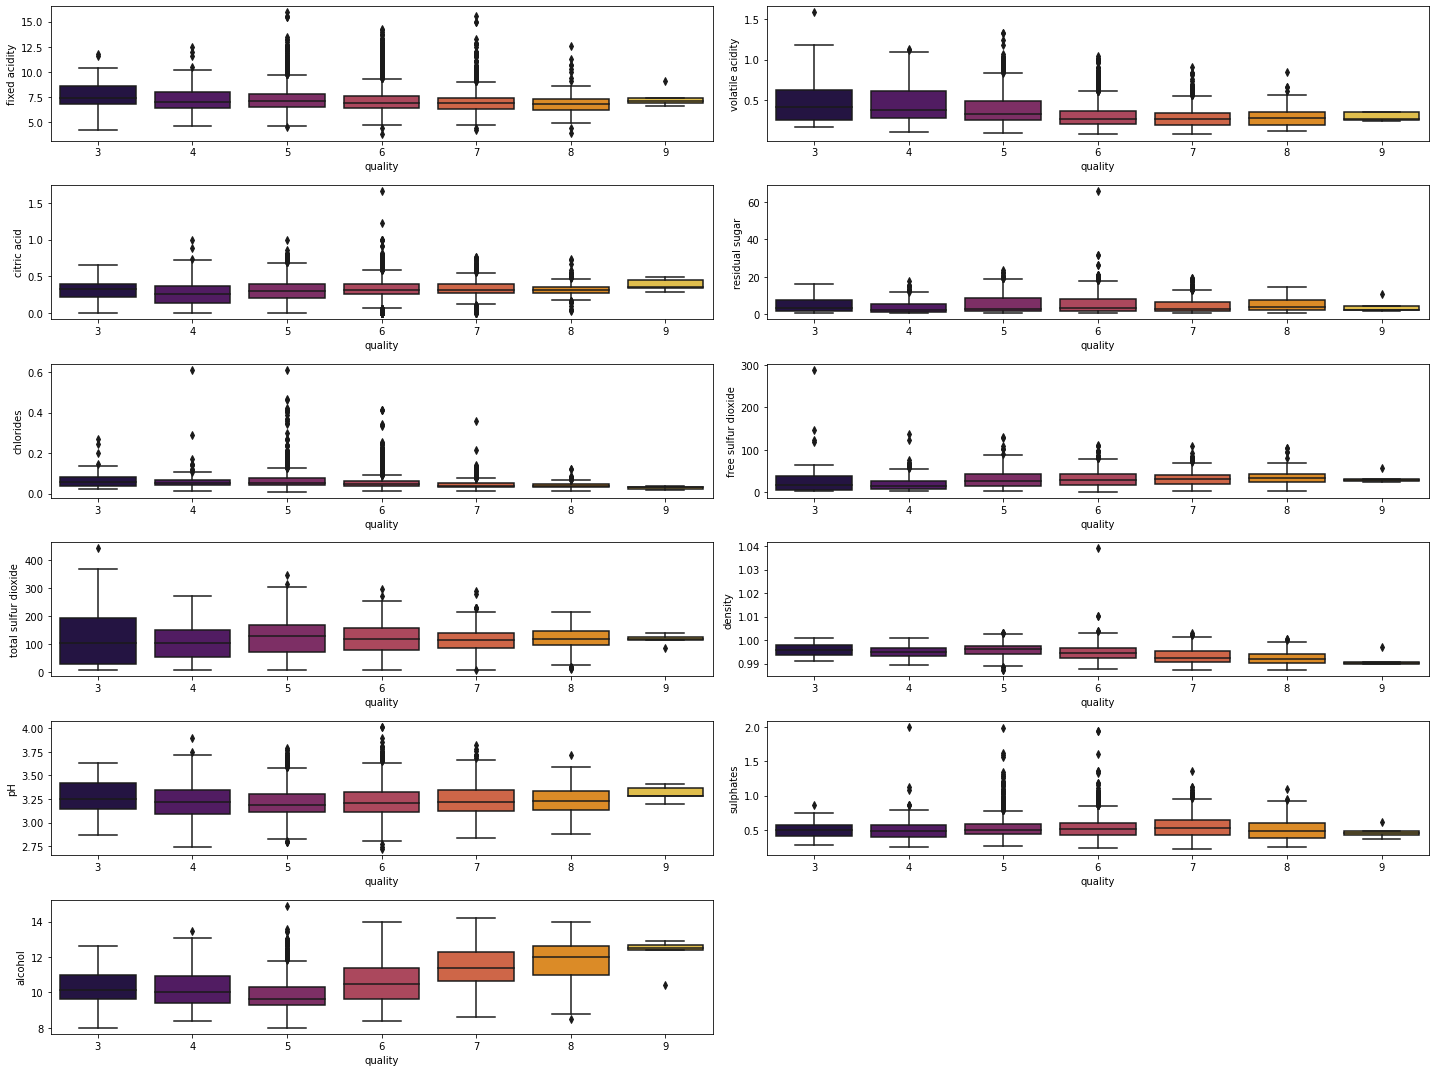

In [20]:
fig, axs = plt.subplots(6,2,figsize=(20,15))
axs = axs.ravel()

for column,ax in zip(df.columns,axs):
    sns.boxplot(data=df,y=column,x='quality',ax=ax,palette='inferno')

fig.delaxes(axs[-1])
plt.tight_layout()


Volatilidade dos acidos, densidade e cloretos em menores quantidades fazem a qualidade do vinho melhorar. A quantidade de alcool e a quantidade de sulfur dioxide (total ou livre) parecem melhorar a qualidade do vinho a medida que aumentamos a quantidade. A outras variáveis parecem não ter aumento ou decrescimo a medida que a qualidade do vinho melhora

----------------------

# Modelagem 1 (Regressões Lineares)

## Vamos começar a criar nosso modelo de regressão linear multipla e iremos separar o dataset entre X e Y

In [55]:

# definindo a variável target
y = df['quality'].copy()

# definindo as variáveis dependentes
X = df.copy().drop(labels='quality',axis=1)

display(y.head(),X.head())



0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  redwine  
0      9.4        1  
1      9.8        1  
2      9.8        1  
3      9.8        1  
4      9.4        1

## Divindo o dataset em base de test e base de treino para realizar a regressão

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=43,stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4547, 12) (1950, 12) (4547,) (1950,)


## Também será feito o processo de normalização das variáveis para remover o efeito da ordem de grandeza e para normalizar todas as variáveis não normais

In [23]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)

X_test_std = std.transform(X_test)

## Regressão linear multipla

Regressão Linear Multipla: 0.3019 
RMSE 0.7286211541439768
MSE 0.5308887862661007
MAE 0.5682573983408372


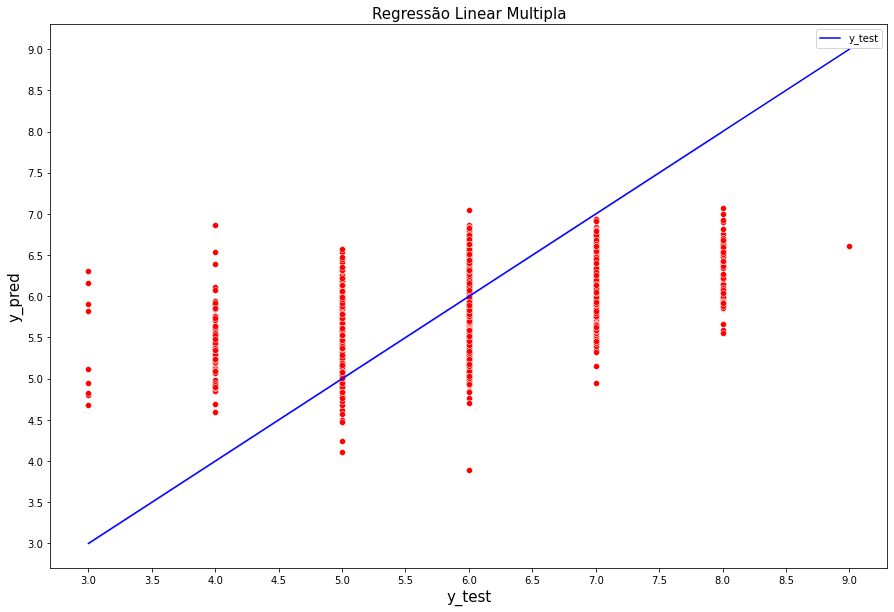

In [24]:
reg = LinearRegression()

reg.fit(X_train_std,y_train)

y_pred = reg.predict(X_test_std)


def regression_metrics (y_test,y_pred,model_name):

    r2 = r2_score(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared = False)
    mse = mean_squared_error(y_test,y_pred,squared = True)
    mae = mean_absolute_error(y_test,y_pred)

    print(f'{model_name}: {r2:.4f} ')
    print(f'RMSE {rmse}')
    print(f'MSE {mse}')
    print(f'MAE {mae}')

    fig,ax = plt.subplots(1,1,figsize=(15,10))
    ax=sns.scatterplot(x=y_test,y=y_pred,color='red')
    sns.lineplot(x=y_test,y=y_test,color='blue',label='y_test')
    ax.set_xlabel('y_test',fontsize=15)
    ax.set_ylabel('y_pred',fontsize=15)
    ax.set_title(f'{model_name}',fontsize=15)
    ax.legend()
    ticks = [i for i in np.arange(min(y_test),max(y_test)+0.5,0.5)]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks);

    return r2

r2= regression_metrics(y_test,y_pred,'Regressão Linear Multipla')


In [25]:
coefs = pd.DataFrame({"Features":X_train.columns,"Importance":reg.coef_}).sort_values(by='Importance',ascending=False)
coefs

Features  Importance
3         residual sugar    0.308404
10               alcohol    0.241461
11               redwine    0.165961
0          fixed acidity    0.124532
9              sulphates    0.118373
5    free sulfur dioxide    0.085136
8                     pH    0.080380
2            citric acid   -0.010739
4              chlorides   -0.023767
6   total sulfur dioxide   -0.076067
1       volatile acidity   -0.242735
7                density   -0.342107

## Regressão Linear com a penalização Lasso e com validação cruzada

Lasso: 0.3022 
RMSE 0.7284876752506051
MSE 0.5306942929920311
MAE 0.5682706864759197


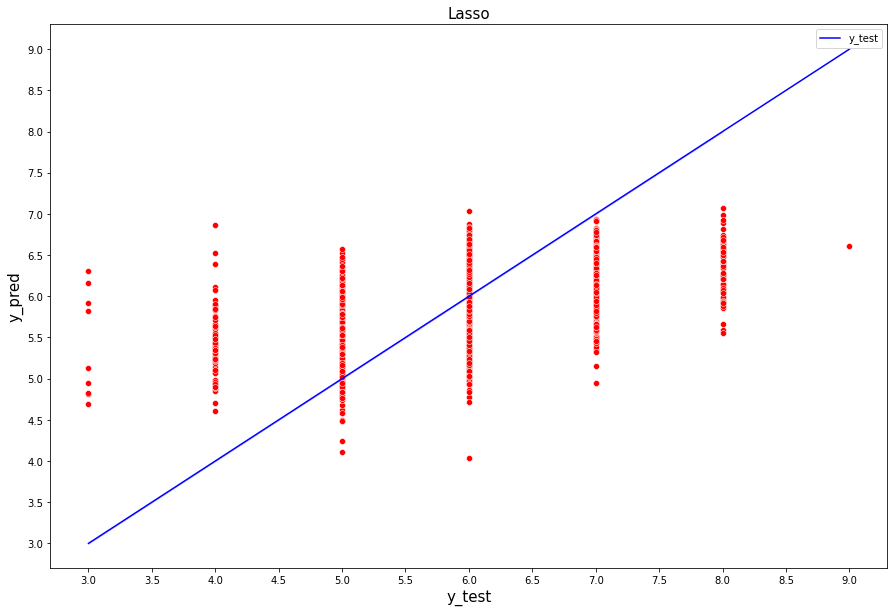

In [26]:
lasso = LassoCV(cv=10)

lasso.fit(X_train_std,y_train)

y_pred_lasso = lasso.predict(X_test_std)

r2_lasso = regression_metrics(y_test,y_pred_lasso,'Lasso')

In [27]:
coefs = pd.DataFrame({"Features":X_train.columns,"Importance":lasso.coef_}).sort_values(by='Importance',ascending=False)
coefs

Features  Importance
3         residual sugar    0.296052
10               alcohol    0.249687
11               redwine    0.159370
9              sulphates    0.116839
0          fixed acidity    0.116520
5    free sulfur dioxide    0.084669
8                     pH    0.075925
2            citric acid   -0.010098
4              chlorides   -0.023890
6   total sulfur dioxide   -0.076318
1       volatile acidity   -0.242135
7                density   -0.322635

## Regressão Linear com a penalização Ridge e com validação cruzada

Ridge: 0.3023 
RMSE 0.728448084653647
MSE 0.5306366120355669
MAE 0.5682266787771725


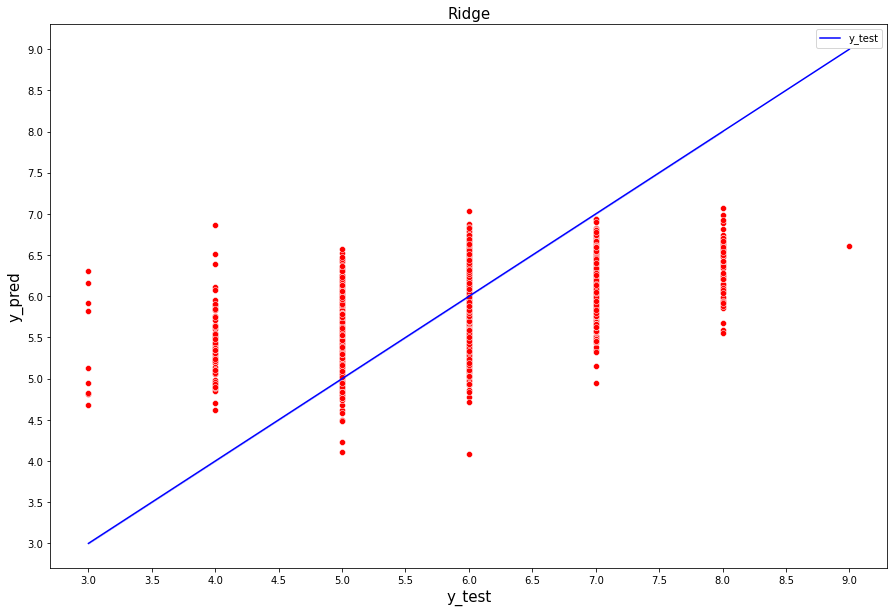

In [28]:
ridge = RidgeCV(cv=10)

ridge.fit(X_train_std,y_train)

y_pred_ridge = ridge.predict(X_test_std)

r2_ridge = regression_metrics(y_test,y_pred_ridge,'Ridge')


In [29]:
coefs = pd.DataFrame({"Features":X_train.columns,"Importance":ridge.coef_}).sort_values(by='Importance',ascending=False)
coefs

Features  Importance
3         residual sugar    0.291295
10               alcohol    0.252473
11               redwine    0.155945
9              sulphates    0.116685
0          fixed acidity    0.114440
5    free sulfur dioxide    0.085850
8                     pH    0.074715
2            citric acid   -0.010581
4              chlorides   -0.024673
6   total sulfur dioxide   -0.078002
1       volatile acidity   -0.241970
7                density   -0.315109

## Regressão Linear com a penalização Elastic-Net e com validação cruzada

Elastic-net: 0.3022 
RMSE 0.7284608432771973
MSE 0.5306552001881254
MAE 0.5682655680273249


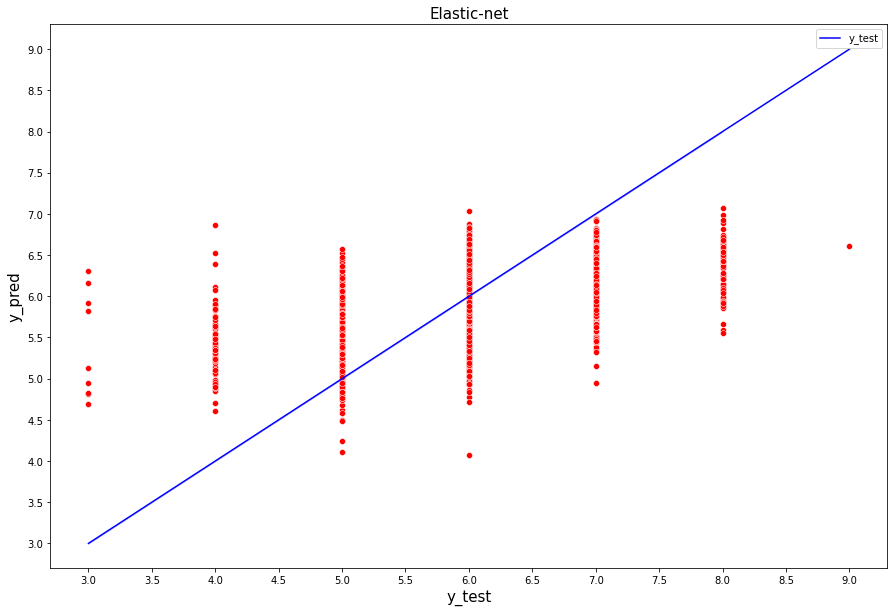

In [30]:
elasticnet = ElasticNetCV(cv=10)

elasticnet.fit(X_train_std,y_train)

y_pred_elasticnet = elasticnet.predict(X_test_std)

r2_elasticnet = regression_metrics(y_test,y_pred_elasticnet,'Elastic-net')

In [31]:
coefs = pd.DataFrame({"Features":X_train.columns,"Importance":elasticnet.coef_}).sort_values(by='Importance',ascending=False)
coefs

Features  Importance
3         residual sugar    0.293023
10               alcohol    0.251639
11               redwine    0.157594
9              sulphates    0.116540
0          fixed acidity    0.114733
5    free sulfur dioxide    0.084798
8                     pH    0.074922
2            citric acid   -0.010071
4              chlorides   -0.024050
6   total sulfur dioxide   -0.076665
1       volatile acidity   -0.242001
7                density   -0.317852

In [32]:
r2s = [r2,r2_lasso,r2_ridge,r2_elasticnet]
models = ['linearregression','lasso','rigde','elastic-net']

for r2,model in zip(r2s,models):
    print(f'{model}: {r2:.5f} ')

# Todos os modelos tiveram underfit tendo uma complexidade muito menor que do que a necessária e um erro muito elevado

linearregression: 0.30194 
lasso: 0.30219 
rigde: 0.30227 
elastic-net: 0.30224 


## Vamos verificar a partir de um histograma a normalidade dos resíduos

In [33]:
residual = y_test - y_pred
residual_lasso = y_test - y_pred_lasso
residual_ridge = y_test - y_pred_ridge
residual_elasticnet = y_test - y_pred_elasticnet

residuals = [residual, residual_lasso,residual_ridge,residual_elasticnet]

df_residuals = pd.DataFrame({model: residual for model,residual in zip(models,residuals)})
df_residuals.iplot(kind='hist',subplots=True)


Todos parecem ser normais

O melhor foi a regressão linear com penalização Ridge. Vamos tentar novamente criar o modelo de regressão linear (ridge) removendo as seguintes colunas devido a baixa feature importance:
- citric acid
- chlorides

In [56]:
# definindo a variável target
y = df['quality'].copy()

# definindo as variáveis dependentes
X = df.copy().drop(labels=['quality','citric acid','chlorides'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=43)


std = StandardScaler()

X_train_std = std.fit_transform(X_train)

X_test_std = std.transform(X_test)

ridge_ = RidgeCV(cv=10)
ridge_.fit(X_train_std,y_train)
y_pred_ = ridge_.predict(X_test_std)
r2_ridge_ = r2_score(y_test,y_pred_)

print(f'Regressão linear multipla R^2: {r2_ridge_:.5f} ')

coefs = pd.DataFrame({"Features":X_train.columns,"Importance":ridge_.coef_}).sort_values(by='Importance',ascending=False)

print(coefs)

Regressão linear multipla R^2: 0.29823 
               Features  Importance
2        residual sugar    0.277384
8               alcohol    0.276364
9               redwine    0.157167
3   free sulfur dioxide    0.094154
0         fixed acidity    0.089229
7             sulphates    0.080620
6                    pH    0.078137
4  total sulfur dioxide   -0.078356
1      volatile acidity   -0.247144
5               density   -0.285585


Ocorreu uma piora do modelo ao remover as colunas

## Conclusão Modelos de Regressão Linear Multipla

Nenhum dos modelos parece ter se adequado bem aos dados, tendo R^2 inferiores a 30% (underfiting), ogo as features deixam de explicar 70% da variação dos dados. É importante notar que a regressão linear dá valores contínuos de qualidade do vinho e os valores de qualidade são discretos, dessa forma, dificilmente o modelo conseguirá acertar os valores.

Uma outra estratégia que será usada será classificar os vinhos entre bom e ruim (a partir do valor da nota) e, a partir disso, usar modelos de regressão logística para classificação a partir das features

------------------------

# Modelagem 2 (Regressão Logística)

## Antes de iniciarmos a regressão logística vamos classificar o vinho em bom (nota >=6) ou ruim (nota <6)

In [59]:
df['is_good'] = np.where(df['quality']<6,0,1)
df


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  redwine  is_good  
0         9.4        5        1        0  
1         9.8        5        1        0  
2         9.8        5        1        0  
3         9.8        6        1        1  
4         9.4        5        1        0  
...       ...      ...      ...      ...  
4893     11.2        6        0        1  
4894      9.6        5        0        0  
4895      9.4        6        0        1  
4896     12.8        7        0        1  
4897     11.8        6        0        1  

[6497 rows x 14 columns]

## Dividiremos novamente entre base de treino e teste

In [60]:
y = df['is_good']
X = df.drop(columns=['quality','is_good'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=43,stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4547, 12) (1950, 12) (4547,) (1950,)


## Como a amostra está desbalanceada na variável target, usaremos a técnica de smote

In [61]:
print(y_train.value_counts())

smote = SMOTE(random_state=43)

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print(y_train_smote.value_counts())

1    2879
0    1668
Name: is_good, dtype: int64
0    2879
1    2879
Name: is_good, dtype: int64


## Novamente vamos normalizar as features...

In [62]:
std = StandardScaler()

X_train_smote_std = std.fit_transform(X_train_smote)

X_test_std = std.transform(X_test)

## Agora vamos fazer o fit no modelo de regressão logística

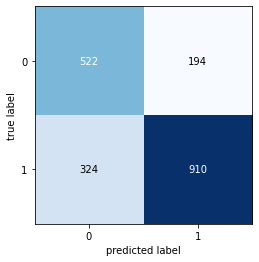

In [63]:
logistic = LogisticRegression()

logistic.fit(X_train_smote_std,y_train_smote)

y_pred = logistic.predict(X_test_std)

confusion_m = confusion_matrix(y_test,y_pred)


plot_confusion_matrix(conf_mat=confusion_m)
plt.show()

Por essa matriz de confusão 0 = 'ruim' e 1 = 'bom'

Aqui o falso positivo (vinho ser ruim e classificarmos como bom) está sendo menor e o falso negativo(vinho ser bom classificarmos como ruim) está sendo maior

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       716
           1       0.82      0.74      0.78      1234

    accuracy                           0.73      1950
   macro avg       0.72      0.73      0.72      1950
weighted avg       0.75      0.73      0.74      1950



A partir do classification report é possível perceber que de todos os resultados positivos que ele preve ele acerta 82% (precision) mas quando esses resultados são comparados a todos os positivos incluindo os da base de teste sua predição cai para 74% (recall)

Dos resultados ruins que ele previu, ele acertou 62% (precision) e dos resultados ruins que ele preve comparado a todos os resultados ruins ele acertou 73% (recall)

## Escolhendo o Threshold

Por padrão o threshold da regressão logística é 50% mas diferentes tipos de erros podem ter custos diferentes falso positivo (vinho é ruim mas falamos que é bom) e falso negativo (vinho é bom mas falamos que é ruim)

Vamos alterar esse threshold e partir das medições de precision e recall fazer cenários em que seria ideial priorizar a minimização do falso positivo ou do falso negativo

In [65]:
y_predict_proba = logistic.predict_proba(X_test_std)

precision, recall, thresholds = precision_recall_curve(y_test,np.round(y_predict_proba[:,1],2))

#pegando cada valor de precisão e recall e vendo a diferença absoluta para descobrir onde precision e recall se cruzam para ajustar o threshold

tb = pd.DataFrame({'precision':precision[:-1],'recall':recall[:-1],'thresholds':thresholds})
tb['dif'] = np.abs(tb['recall'] - tb['precision'])
tb.sort_values(by='dif',ascending=True)

precision    recall  thresholds       dif
42   0.800648  0.800648        0.44  0.000000
41   0.800319  0.811994        0.43  0.011674
43   0.805601  0.792545        0.45  0.013057
40   0.796677  0.816045        0.42  0.019368
44   0.807239  0.777147        0.46  0.030092
..        ...       ...         ...       ...
93   0.968421  0.074554        0.95  0.893867
95   0.937500  0.024311        0.97  0.913189
94   0.970588  0.053485        0.96  0.917104
96   0.941176  0.012966        0.98  0.928211
98   1.000000  0.001621        1.00  0.998379

[99 rows x 4 columns]

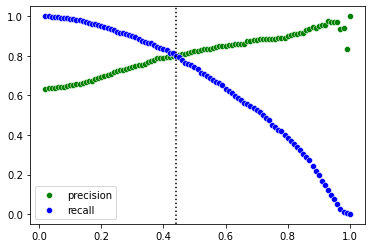

In [66]:
sns.scatterplot(y=precision[:-1],x=thresholds,color='green',label='precision')
sns.scatterplot(y=recall[:-1],x=thresholds,color='blue',label='recall')
plt.axvline(x=0.44,ls=':',c='black')

Esse é o TS que maximiza o recall e a precision ao mesmo tempo. Agora vamos calibrar nosso modelo novamente com esse novo TS

É importante deixar claro que maximizar que em determinados modelos de negócio faz mais sentido focar na precision do que no recall e vice versa. Por exemplo, uma start up que está iniciando sua trajetória dará muito mais importância a minimizar o falso positivo (precision) porque precisa construir credibilidade no mercado e ganhar marketshare do que uma grande empresa que já está bem estabelecida no mercado. Uma empresa de grande porta, por outro lado, tenderá a ter mais interesse em focar em um baixo falso positivo (recall) porque não é interessante vender um vinho bom por um preço menor. Isso também dependerá do objetivo daquele modelo, já que esse exemplo acima pode não fazer sentido em alguns cenários, por exemplo, no lançamento de um novo produto de uma empresa grande em que a credibilidade e ganho de market share é mais importante do que a lucratividade inicialmente

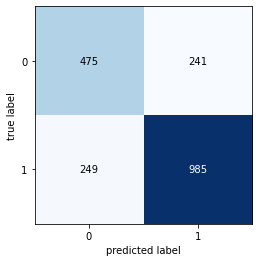

In [67]:
y_pred_ajust = np.where(y_predict_proba[:,1]>0.44,1,0)

confusion_m = confusion_matrix(y_test,y_pred_ajust)


plot_confusion_matrix(conf_mat=confusion_m)
plt.show()

In [68]:
print(classification_report(y_test,y_pred_ajust))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       716
           1       0.80      0.80      0.80      1234

    accuracy                           0.75      1950
   macro avg       0.73      0.73      0.73      1950
weighted avg       0.75      0.75      0.75      1950



Após o ajuste de TS nossa precisão pirou um pouco mas nosso recall melhorou em uma escala maior, o que pode ser observado pelo F1. Aqui será necessário considerar o uso do modelo, como explicado acima, e a partir dai priorizar melhorar o recall ou precision. Businees que focam indicar vinhos bons, focariam em recall e business que focam descartar vinhos ruins, focariam na precision 

## Vamos também tentar balancear fazendo undersampling ao invés de oversampling para evitar gerar amostrar artificiais e ver como o modelo performa

In [69]:
print(y_train.value_counts())

nm = NearMiss()

X_train_nm, y_train_nm = nm.fit_resample(X_train,y_train)

print(y_train_nm.value_counts())

std = StandardScaler()

X_train_nm_std = std.fit_transform(X_train_nm)

X_test_nm_std = std.transform(X_test)

1    2879
0    1668
Name: is_good, dtype: int64
0    1668
1    1668
Name: is_good, dtype: int64


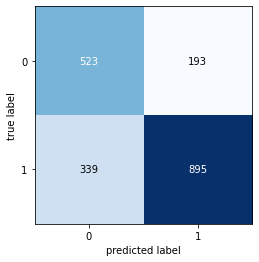

In [70]:
logistic2 = LogisticRegression()

logistic2.fit(X_train_nm_std,y_train_nm)

y_pred_nm = logistic2.predict(X_test_nm_std)

confusion_m = confusion_matrix(y_test,y_pred_nm)


plot_confusion_matrix(conf_mat=confusion_m)
plt.show()

In [71]:
print(classification_report(y_test,y_pred_nm))

              precision    recall  f1-score   support

           0       0.61      0.73      0.66       716
           1       0.82      0.73      0.77      1234

    accuracy                           0.73      1950
   macro avg       0.71      0.73      0.72      1950
weighted avg       0.74      0.73      0.73      1950



## Novamente vamos fazer o ajuste de TS

In [72]:
y_predict_proba_nm = logistic.predict_proba(X_test_nm_std)

precision, recall, thresholds = precision_recall_curve(y_test,np.round(y_predict_proba_nm[:,1],2))

#pegando cada valor de precisão e recall e vendo a diferença absoluta para descobrir onde precision e recall se cruzam para ajustar o threshold

tb = pd.DataFrame({'precision':precision[:-1],'recall':recall[:-1],'thresholds':thresholds})
tb['dif'] = np.abs(tb['recall'] - tb['precision'])
tb.sort_values(by='dif',ascending=True)

precision    recall  thresholds       dif
43   0.802429  0.803079        0.45  0.000650
42   0.797923  0.809562        0.44  0.011639
44   0.805785  0.790113        0.46  0.015672
41   0.794349  0.820097        0.43  0.025749
45   0.807370  0.781199        0.47  0.026171
..        ...       ...         ...       ...
93   0.965217  0.089951        0.95  0.875266
94   0.964706  0.066451        0.96  0.898255
95   0.959184  0.038088        0.97  0.921096
96   0.952381  0.016207        0.98  0.936173
98   1.000000  0.001621        1.00  0.998379

[99 rows x 4 columns]

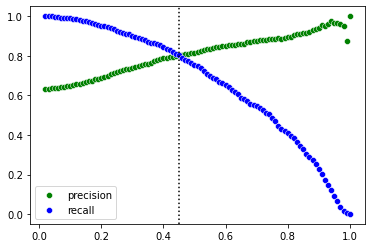

In [73]:
sns.scatterplot(y=precision[:-1],x=thresholds,color='green',label='precision')
sns.scatterplot(y=recall[:-1],x=thresholds,color='blue',label='recall')
plt.axvline(x=0.45,ls=':',c='black')

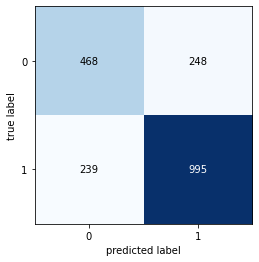

In [74]:
y_pred_ajust_nm = np.where(y_predict_proba[:,1]>0.43,1,0)

confusion_m = confusion_matrix(y_test,y_pred_ajust_nm)


plot_confusion_matrix(conf_mat=confusion_m)
plt.show()

In [75]:
print(classification_report(y_test,y_pred_ajust_nm))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       716
           1       0.80      0.81      0.80      1234

    accuracy                           0.75      1950
   macro avg       0.73      0.73      0.73      1950
weighted avg       0.75      0.75      0.75      1950



O resultado do balanceamento por nearmiss foi bem próximo do resultado feio pelo balanceamento SMOTE. Monstrando que criar as amostras artificiamente não fez praticamente nenhuma diferença para o modelo

## Conclusão Modelo de Regressão Logística

O modelo de regressão logística teve um sucesso relativamente alto em prever a qualidade do vinho (bom ou ruim). Durante o tratamento dos dados o threshold foi ajustado para o valor em que o recall e o precision se igualam já que não havia um problema de negócio específico que deveríamos resolver. Importante destacar que um business essas métricas poderiam ter um novo ajuste fino de acordo com o objetivo do negócio. 

# Conclusão Geral

A predição do vinho a partir de um modelo de regressão claramente não foi a melhor escolha, um dos motivos é a qualidade do vinho ser uma medição discreta e a regressão linear fazer predições de valores contínuis, só isso já aumenta muito os resídulos e dificulta o aprendizado correto do modelo. Ao usar um modelo de classificação o problema de underfit que encontramos na regressão linear já é resolvido e começamos a ter % de acerto na base de teste muito superiores aos da regressão. Dessa forma, o caminho de adotar um modelo de classificação se torna muito mais adequado, sendo necessário somente adequar o threshold para se conseguir uma melhor precision (descartar vinhos ruins) ou recall (recomendar vinhos bons) de acordo com o objetivo do negócio ao criar esse modelo. Nesse projeto foi usada somente a regressão logística para a classificação, porém existem outros modelos que poderiam ser usados e que talvez fossem melhor para prever o comportamento da qualidade do vinho.

--------------------


Ideias de outras análises se der tempo
- Fazer o ajuste fino escolhendo vários lambda caso seja ridge, lasso e elastic-net
- Usar outros modelos de classificação
